## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
hr = pd.read_csv("D:\datasets\HR-Employee-Attrition.csv")

In [4]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Aim :- To build an ML model to predict employee attrition using employee performance, job satisfaction, salary and work-life data.

In [5]:
hr.shape

(1470, 35)

In [6]:
hr.isnull().sum()[hr.isnull().sum() > 0 ]

Series([], dtype: int64)

In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Analysis

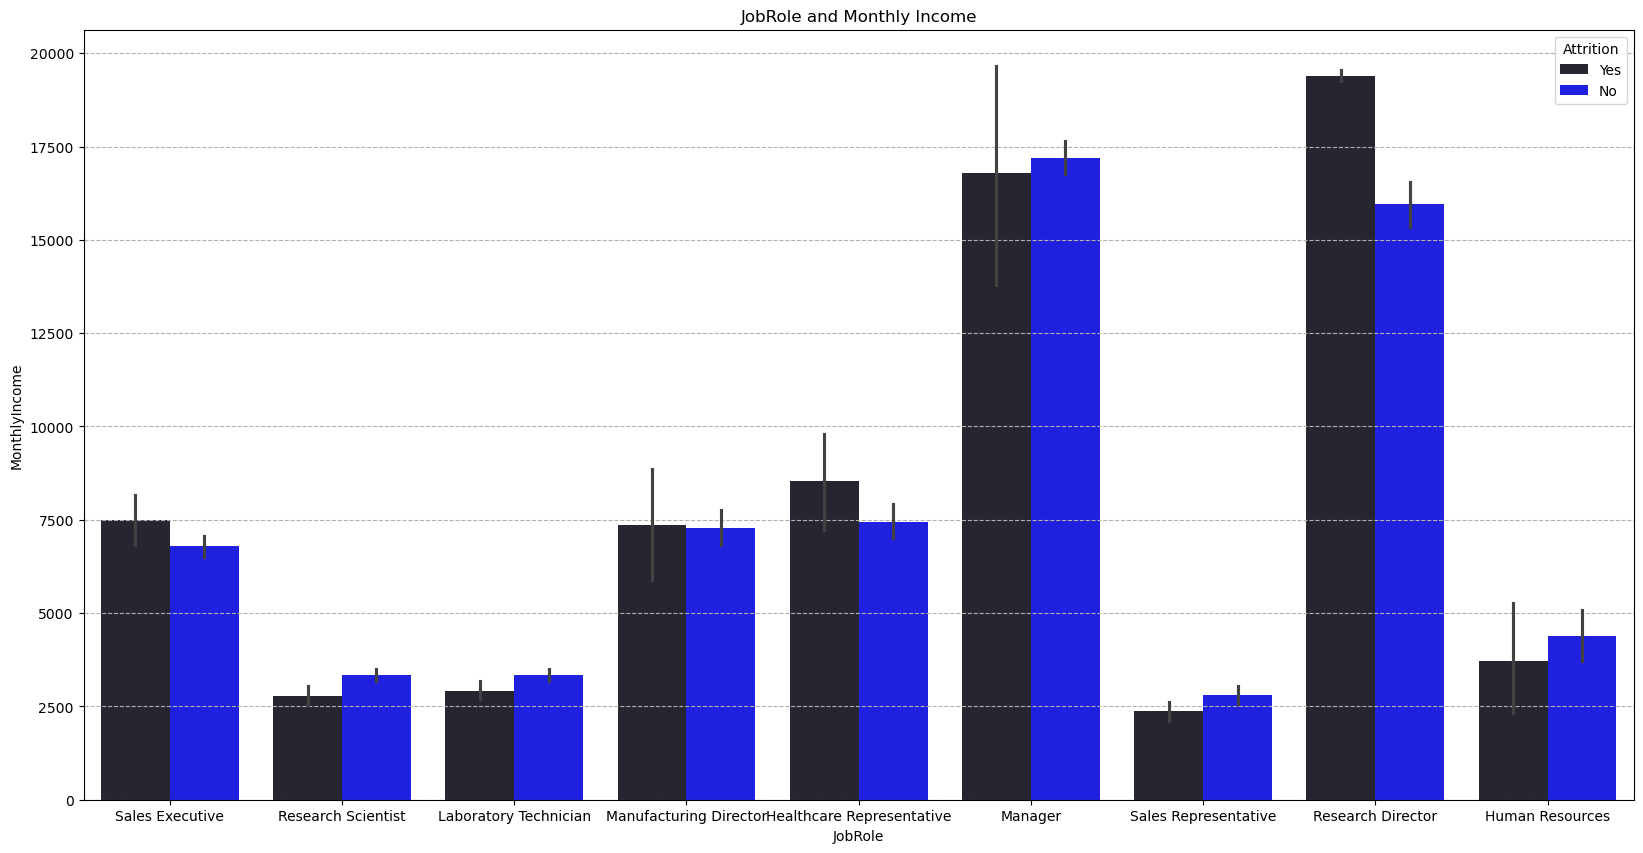

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x='JobRole', y='MonthlyIncome', data=hr, hue='Attrition', color='blue')
plt.title("JobRole and Monthly Income")
plt.grid(linestyle='--', visible=True, axis='y')

Text(0.5, 1.0, 'Monthly Income by Attrition')

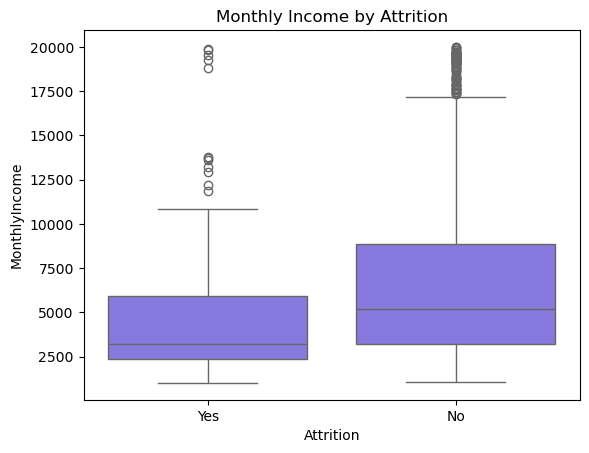

In [9]:
# detect outliers
sns.boxplot(x='Attrition', y='MonthlyIncome', data=hr, color='mediumslateblue' ) 
plt.title("Monthly Income by Attrition")

<module 'matplotlib.pyplot' from 'C:\\Users\\vmane\\anaconda3\\envs\\myjupyter\\lib\\site-packages\\matplotlib\\pyplot.py'>

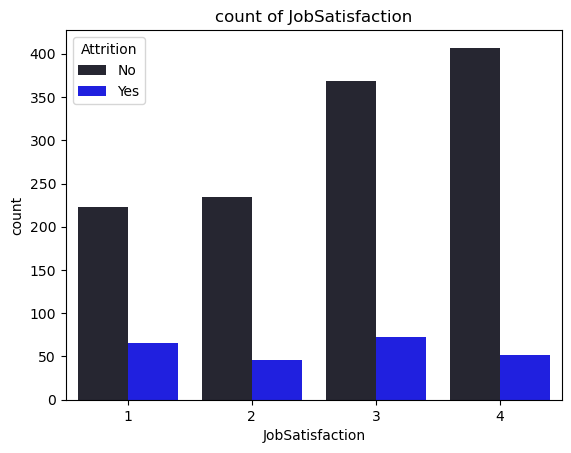

In [10]:
sns.countplot(x='JobSatisfaction', data=hr, color='blue', hue='Attrition' ) 
plt.title("count of JobSatisfaction")
plt

Text(0.5, 1.0, 'count of OverTime by Attrition')

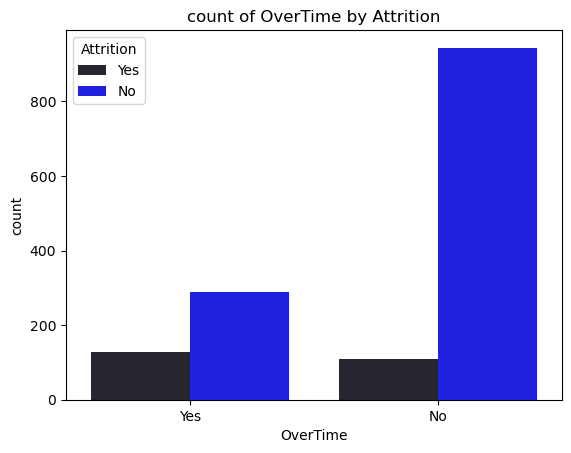

In [11]:
sns.countplot(x='OverTime', data=hr, hue='Attrition', color='blue')
plt.title("count of OverTime by Attrition")

<Axes: xlabel='Attrition', ylabel='Age'>

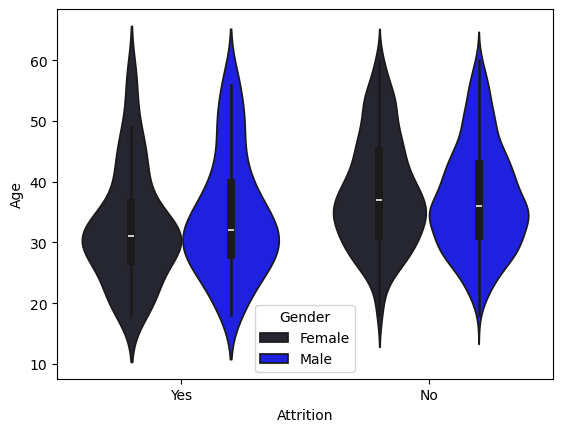

In [12]:
sns.violinplot(x='Attrition', y='Age', data =hr, hue='Gender', color='blue')

In [13]:
print(hr['Over18'].nunique(),  hr['EmployeeCount'].nunique(),  hr['StandardHours'].nunique() )

1 1 1


In [14]:
# only one value in some columns so drop it
hr.drop('Over18', axis=1, inplace = True )
hr.drop('StandardHours', axis=1, inplace = True )
hr.drop('EmployeeCount', axis=1, inplace = True )

#### Convert categorical values into numbers

In [15]:
hr[hr.select_dtypes(include='object').columns].head(10)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,No,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


In [16]:
hr.Attrition.replace({'Yes':1, 'No':0 }, inplace=True )
hr.BusinessTravel.replace({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2 }, inplace=True)
hr.Gender.replace({'Female':1, 'Male':0 }, inplace=True )
hr.MaritalStatus.replace({'Single':0, 'Married':1, 'Divorced':2 }, inplace=True)
hr.OverTime.replace({'Yes':1, 'No':0 }, inplace=True )

In [17]:
hr[hr.select_dtypes(include='object').columns].head(10)

,Department,EducationField,JobRole
0,Sales,Life Sciences,Sales Executive
1,Research & Development,Life Sciences,Research Scientist
2,Research & Development,Other,Laboratory Technician
3,Research & Development,Life Sciences,Research Scientist
4,Research & Development,Medical,Laboratory Technician
5,Research & Development,Life Sciences,Laboratory Technician
6,Research & Development,Medical,Laboratory Technician
7,Research & Development,Life Sciences,Laboratory Technician
8,Research & Development,Life Sciences,Manufacturing Director
9,Research & Development,Medical,Healthcare Representative


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
hr[hr.select_dtypes(include='object').columns] = hr[hr.select_dtypes(include='object').columns].apply(le.fit_transform)

In [20]:
hr.select_dtypes(include='object').columns

Index([], dtype='object')

In [21]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


#### Correlation

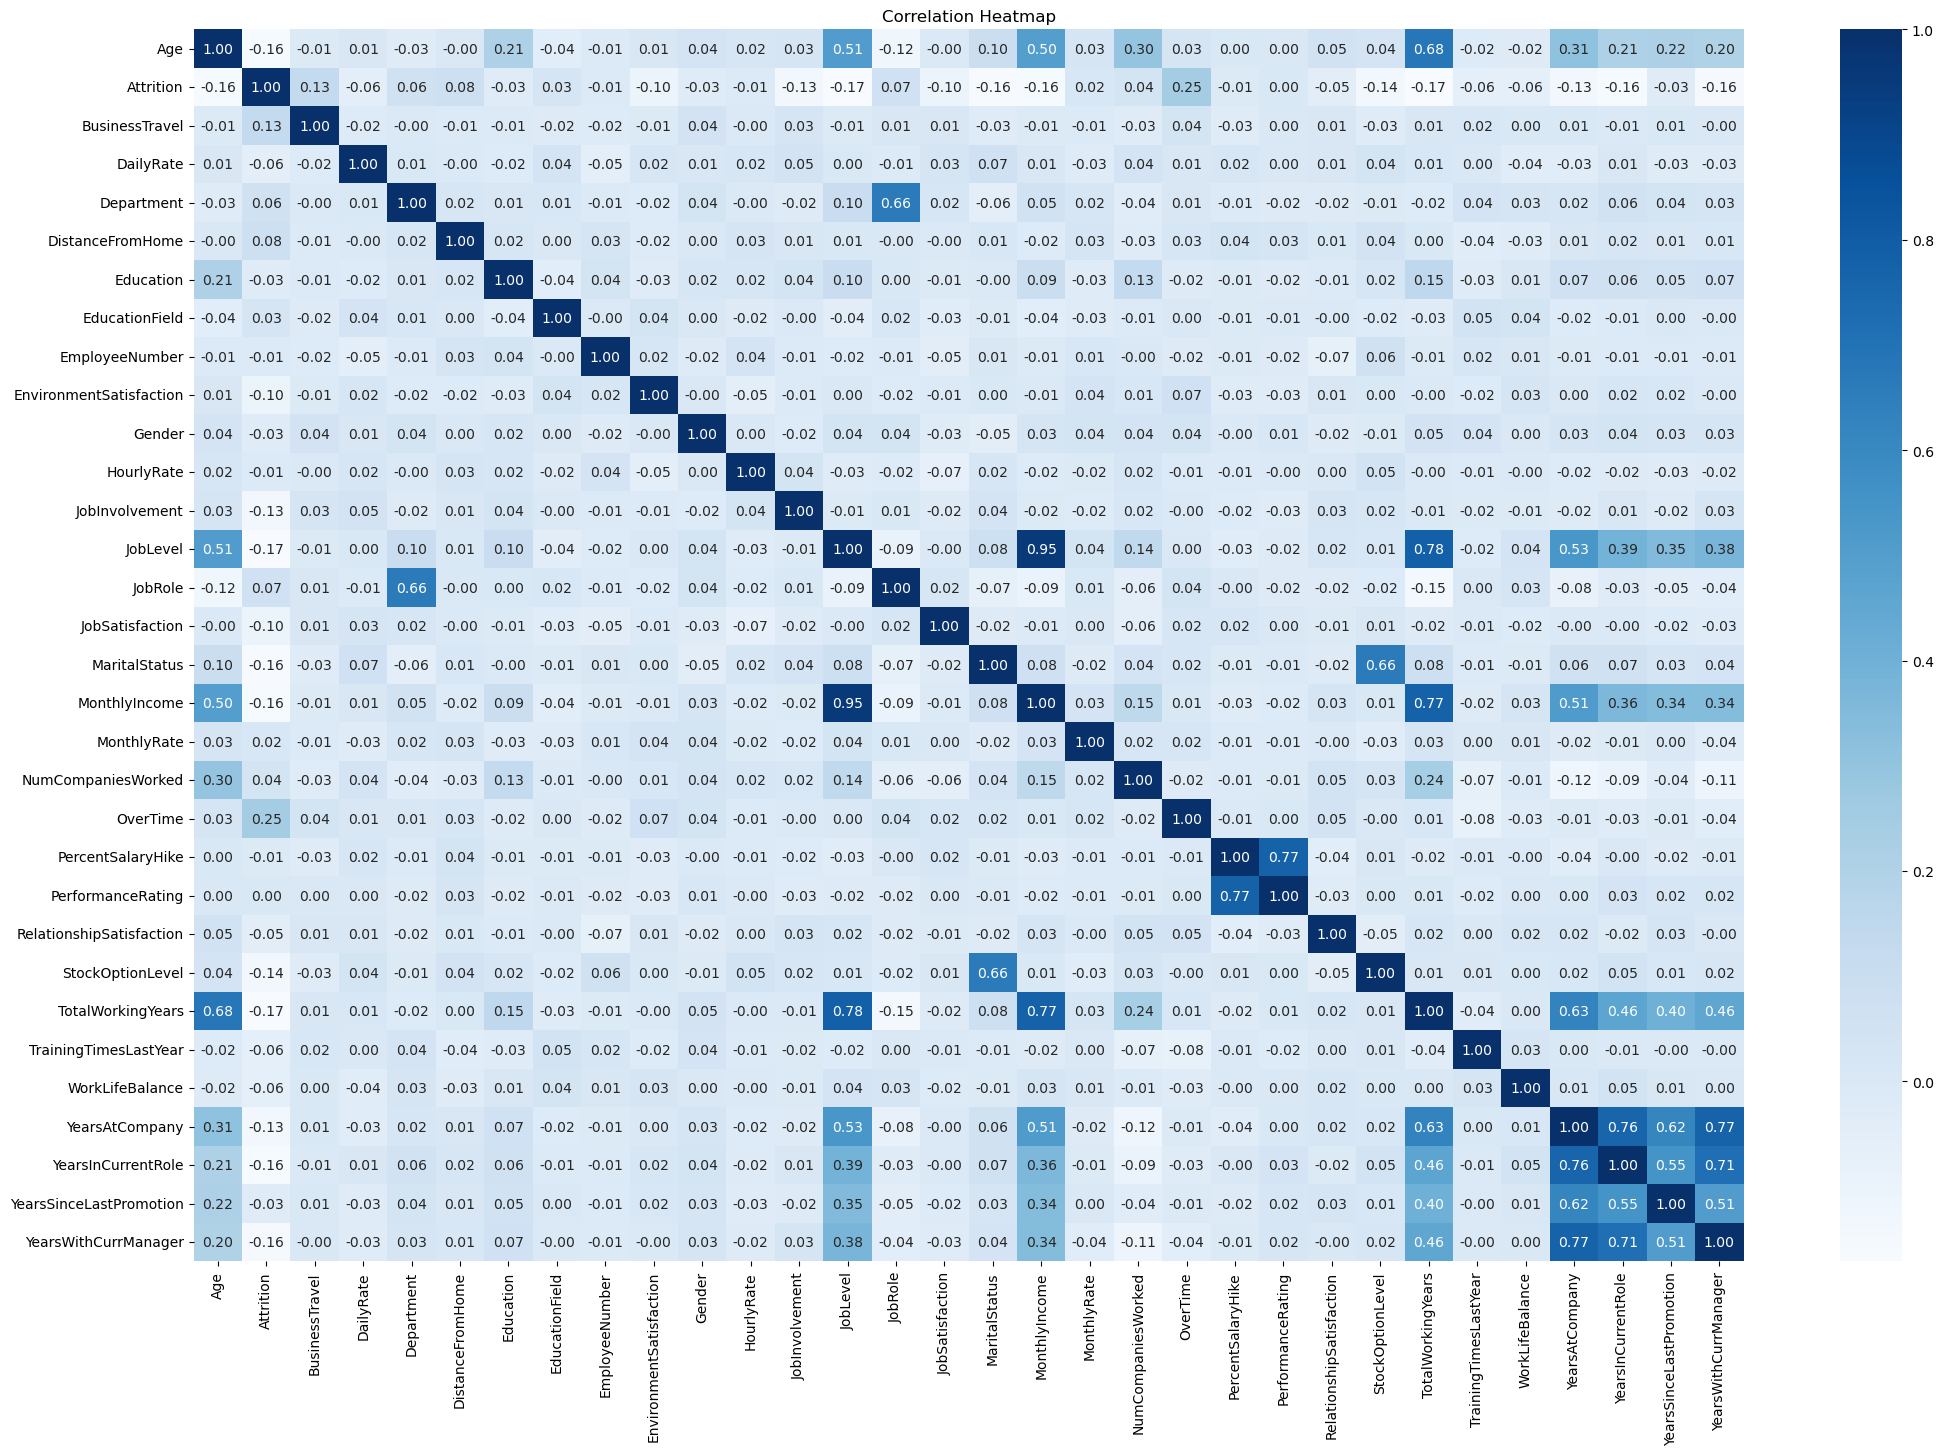

In [22]:
plt.figure(figsize=(25,16))
sns.heatmap(hr.corr(), annot=True, cmap="Blues", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
hr['Attrition'].corr(hr.JobSatisfaction)

np.float64(-0.10348112606902088)

In [24]:
# check the correlation of all columns with Attrition

In [25]:
l1 = list(hr.columns)
type(l1)

list

In [26]:
l1.remove('Attrition')
l1

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [27]:
corr_list = []
for i in l1:
    score = hr['Attrition'].corr(hr[i])
    corr_list.append(score)

In [28]:
df1 = pd.DataFrame()
df1['column'] = l1
df1['correlation'] = corr_list

In [29]:
df1

,column,correlation
0,Age,-0.159205
1,BusinessTravel,0.127006
2,DailyRate,-0.056652
3,Department,0.063991
4,DistanceFromHome,0.077924
5,Education,-0.031373
6,EducationField,0.026846
7,EmployeeNumber,-0.010577
8,EnvironmentSatisfaction,-0.103369
9,Gender,-0.029453


### Sampling

In [30]:
x = hr.drop('Attrition', axis=1)
y = hr.Attrition

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [33]:
x_train.shape,  x_test.shape,  y_train.shape,  y_test.shape

((1176, 31), (294, 31), (1176,), (294,))

### Model Building

#### 1. logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [35]:
log.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
pred_log = log.predict(x_test)

In [37]:
# Matrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [38]:
# confusion matrix
tab_log = confusion_matrix(y_test, pred_log)
tab_log

array([[248,   1],
       [ 44,   1]])

In [39]:
acc_log = accuracy_score(y_test, pred_log)
precision_log = precision_score(y_test, pred_log)
recall_log = recall_score(y_test, pred_log)

print("accuracy:", acc_log, " Precision:",precision_log, " recall:",recall_log )

accuracy: 0.8469387755102041  Precision: 0.5  recall: 0.022222222222222223


#### 2. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [41]:
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
pred_dt = dt.predict(x_test)

In [43]:
tab_dt = confusion_matrix(y_test, pred_dt)
tab_dt

array([[222,  27],
       [ 27,  18]])

In [44]:
acc_dt = accuracy_score(y_test, pred_dt)
precision_dt = precision_score(y_test, pred_dt)
recall_dt = recall_score(y_test, pred_dt)

print("accuracy:", acc_dt, " Precision:",precision_dt, " recall:",recall_dt )

accuracy: 0.8163265306122449  Precision: 0.4  recall: 0.4


#### 3. Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [46]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
pred_rf = rf.predict(x_test)

In [48]:
tab_rf = confusion_matrix(y_test, pred_rf)
tab_rf

array([[246,   3],
       [ 37,   8]])

In [49]:
acc_rf = accuracy_score(y_test, pred_rf)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)

print("accuracy:", acc_rf, " Precision:",precision_rf, " recall:",recall_rf )

accuracy: 0.8639455782312925  Precision: 0.7272727272727273  recall: 0.17777777777777778


## SMOTE

In [50]:
y_train.value_counts()

Attrition
0    984
1    192
Name: count, dtype: int64

In [51]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=.7)

In [52]:
x_resampled, y_resempled = smote.fit_resample(x_train, y_train)

In [53]:
y_resempled.value_counts()

Attrition
0    984
1    688
Name: count, dtype: int64

### logistic Regression with SMOTE

In [54]:
log_smote = LogisticRegression()
log_smote.fit(x_resampled, y_resempled)
pred_log_smote = log_smote.predict(x_test)
tab_log_smote = confusion_matrix(y_test, pred_log_smote)
tab_log_smote

array([[190,  59],
       [ 25,  20]])

In [55]:
acc_log_smote = accuracy_score(y_test, pred_log_smote)
precision_log_smote = precision_score(y_test, pred_log_smote)
recall_log_smote = recall_score(y_test, pred_log_smote)

print("accuracy:", acc_log_smote, " Precision:", precision_log_smote, " recall:",recall_log_smote )

accuracy: 0.7142857142857143  Precision: 0.25316455696202533  recall: 0.4444444444444444


### Decision Tree with SMOTE

In [56]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_resampled, y_resempled)
pred_dt_smote = dt_smote.predict(x_test)

tab_dt_smote = confusion_matrix(y_test, pred_dt_smote)
tab_dt_smote

array([[202,  47],
       [ 28,  17]])

In [57]:
acc_dt_smote = accuracy_score(y_test, pred_dt_smote)
precision_dt_smote = precision_score(y_test, pred_dt_smote)
recall_dt_smote = recall_score(y_test, pred_dt_smote)

print("accuracy:", acc_dt_smote, " Precision:",precision_dt_smote, " recall:",recall_dt_smote )

accuracy: 0.7448979591836735  Precision: 0.265625  recall: 0.37777777777777777


### Random Forest with SMOTE

In [58]:
rf_smote = RandomForestClassifier()
rf_smote.fit(x_resampled, y_resempled)
pred_rf_smote = rf_smote.predict(x_test)

tab_rf_smote = confusion_matrix(y_test, pred_rf_smote)
tab_rf_smote

array([[233,  16],
       [ 31,  14]])

In [59]:
acc_rf_smote = accuracy_score(y_test, pred_rf_smote)
precision_rf_smote = precision_score(y_test, pred_rf_smote)
recall_rf_smote = recall_score(y_test, pred_rf_smote)

print("accuracy:", acc_rf_smote, " Precision:",precision_rf_smote, " recall:",recall_rf_smote )

accuracy: 0.8401360544217688  Precision: 0.4666666666666667  recall: 0.3111111111111111


- After analyzing all above models we conclude that Decision Tree gives the best result.
- Decision Tree ->  accuracy: 0.7755102040816326  Precision: 0.3283582089552239  recall: 0.5116279069767442
- here recall is a most important because our aim is to predict employee Attrtion.
- recall captures more actual attrtion cases.

In [94]:
pred = list(dt.predict(x_test)[0:1])
pred

[np.int64(1)]

In [95]:
prob = list(dt.predict_proba(x_test)[0:1])
prob

[array([0., 1.])]

In [96]:
import pickle

In [97]:
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

In [98]:
with open('decision_tree_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [99]:

if pred[0] ==1:
    print("Employee is likely to leave the company")

else:
    print("Employee is likely to stay in the company", round(prob[0][1], 2))

Employee is likely to leave the company
